# Eclipse Analysis: 2024

In [1]:
import datetime
import pytz

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

from hamsci_psws import grape1

In [2]:
mpl.rcParams['font.size']        = 18
mpl.rcParams['font.weight']      = 'bold'
mpl.rcParams['axes.labelweight'] = 'bold'
mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['axes.grid']        = True
mpl.rcParams['grid.linestyle']   = ':'
mpl.rcParams['figure.figsize']   = np.array([15, 8])
mpl.rcParams['axes.xmargin']     = 0

In [21]:
freq            = 10e6 # MHz
# sTime           = datetime.datetime(2024,4,8,0,1, tzinfo=pytz.UTC)
# eTime           = datetime.datetime(2024,4,8,23,59, tzinfo=pytz.UTC)
sTime           = datetime.datetime(2024,4,8,15,0, tzinfo=pytz.UTC)
eTime           = datetime.datetime(2024,4,8,23,0, tzinfo=pytz.UTC)

inventory       = grape1.DataInventory()
inventory.filter(freq=freq,sTime=sTime,eTime=eTime)
grape_nodes     = grape1.GrapeNodes(logged_nodes=inventory.logged_nodes)
inventory.get_nodes()

[8, 20, 34, 76, 83, 91, 1029]

In [22]:
node_nrs        = inventory.get_nodes()
gds = []
for node in node_nrs:
    
    # Skip any buggy nodes.
    if node in [76, 83, 91, 1029]:
        continue
    
    print('================================================================================')
    print('Loading Node {!s}'.format(node))
    gd = grape1.Grape1Data(node,freq,sTime,eTime,inventory=inventory,grape_nodes=grape_nodes)
    gd.process_data()
    gds.append(gd)
    print()

mp          = grape1.GrapeMultiplot(gds)

Loading Node 8


Loading Raw Data:   0%|                                                                           | 0/1 [00:00…

Processing data using "standard" profile...

Computing Solar Local Time on raw data...


  0%|                                                                                         | 0/28125 [00:00…

  Solar Time Computation Time: 0:00:00.796260
Resampling data with 1.0 second cadence...
  Resampling Time: 0:00:00.035927
Computing Solar Local Time on resampled...


  0%|                                                                                         | 0/28800 [00:00…

  Solar Time Computation Time: 0:00:01.073931
dB Conversion
  dB Conversion Time: 0:00:00.001971
Filtering data with 3.3333 minute low-pass Butterworth filter...
  Filtering Time: 0:00:00.015489

Total Processing Time: 0:00:01.925145

Loading Node 20


Loading Raw Data:   0%|                                                                           | 0/1 [00:00…

Processing data using "standard" profile...

Computing Solar Local Time on raw data...


  0%|                                                                                         | 0/28125 [00:00…

  Solar Time Computation Time: 0:00:00.789747
Resampling data with 1.0 second cadence...
  Resampling Time: 0:00:00.039663
Computing Solar Local Time on resampled...


  0%|                                                                                         | 0/28800 [00:00…

  Solar Time Computation Time: 0:00:01.029829
dB Conversion
  dB Conversion Time: 0:00:00.002842
Filtering data with 3.3333 minute low-pass Butterworth filter...
  Filtering Time: 0:00:00.014041

Total Processing Time: 0:00:01.876819

Loading Node 34


Loading Raw Data:   0%|                                                                           | 0/1 [00:00…

Processing data using "standard" profile...

Computing Solar Local Time on raw data...


  0%|                                                                                         | 0/28125 [00:00…

  Solar Time Computation Time: 0:00:01.010459
Resampling data with 1.0 second cadence...
  Resampling Time: 0:00:00.033135
Computing Solar Local Time on resampled...


  0%|                                                                                         | 0/28800 [00:00…

  Solar Time Computation Time: 0:00:00.745155
dB Conversion
  dB Conversion Time: 0:00:00.002971
Filtering data with 3.3333 minute low-pass Butterworth filter...
  Filtering Time: 0:00:00.015249

Total Processing Time: 0:00:01.807681



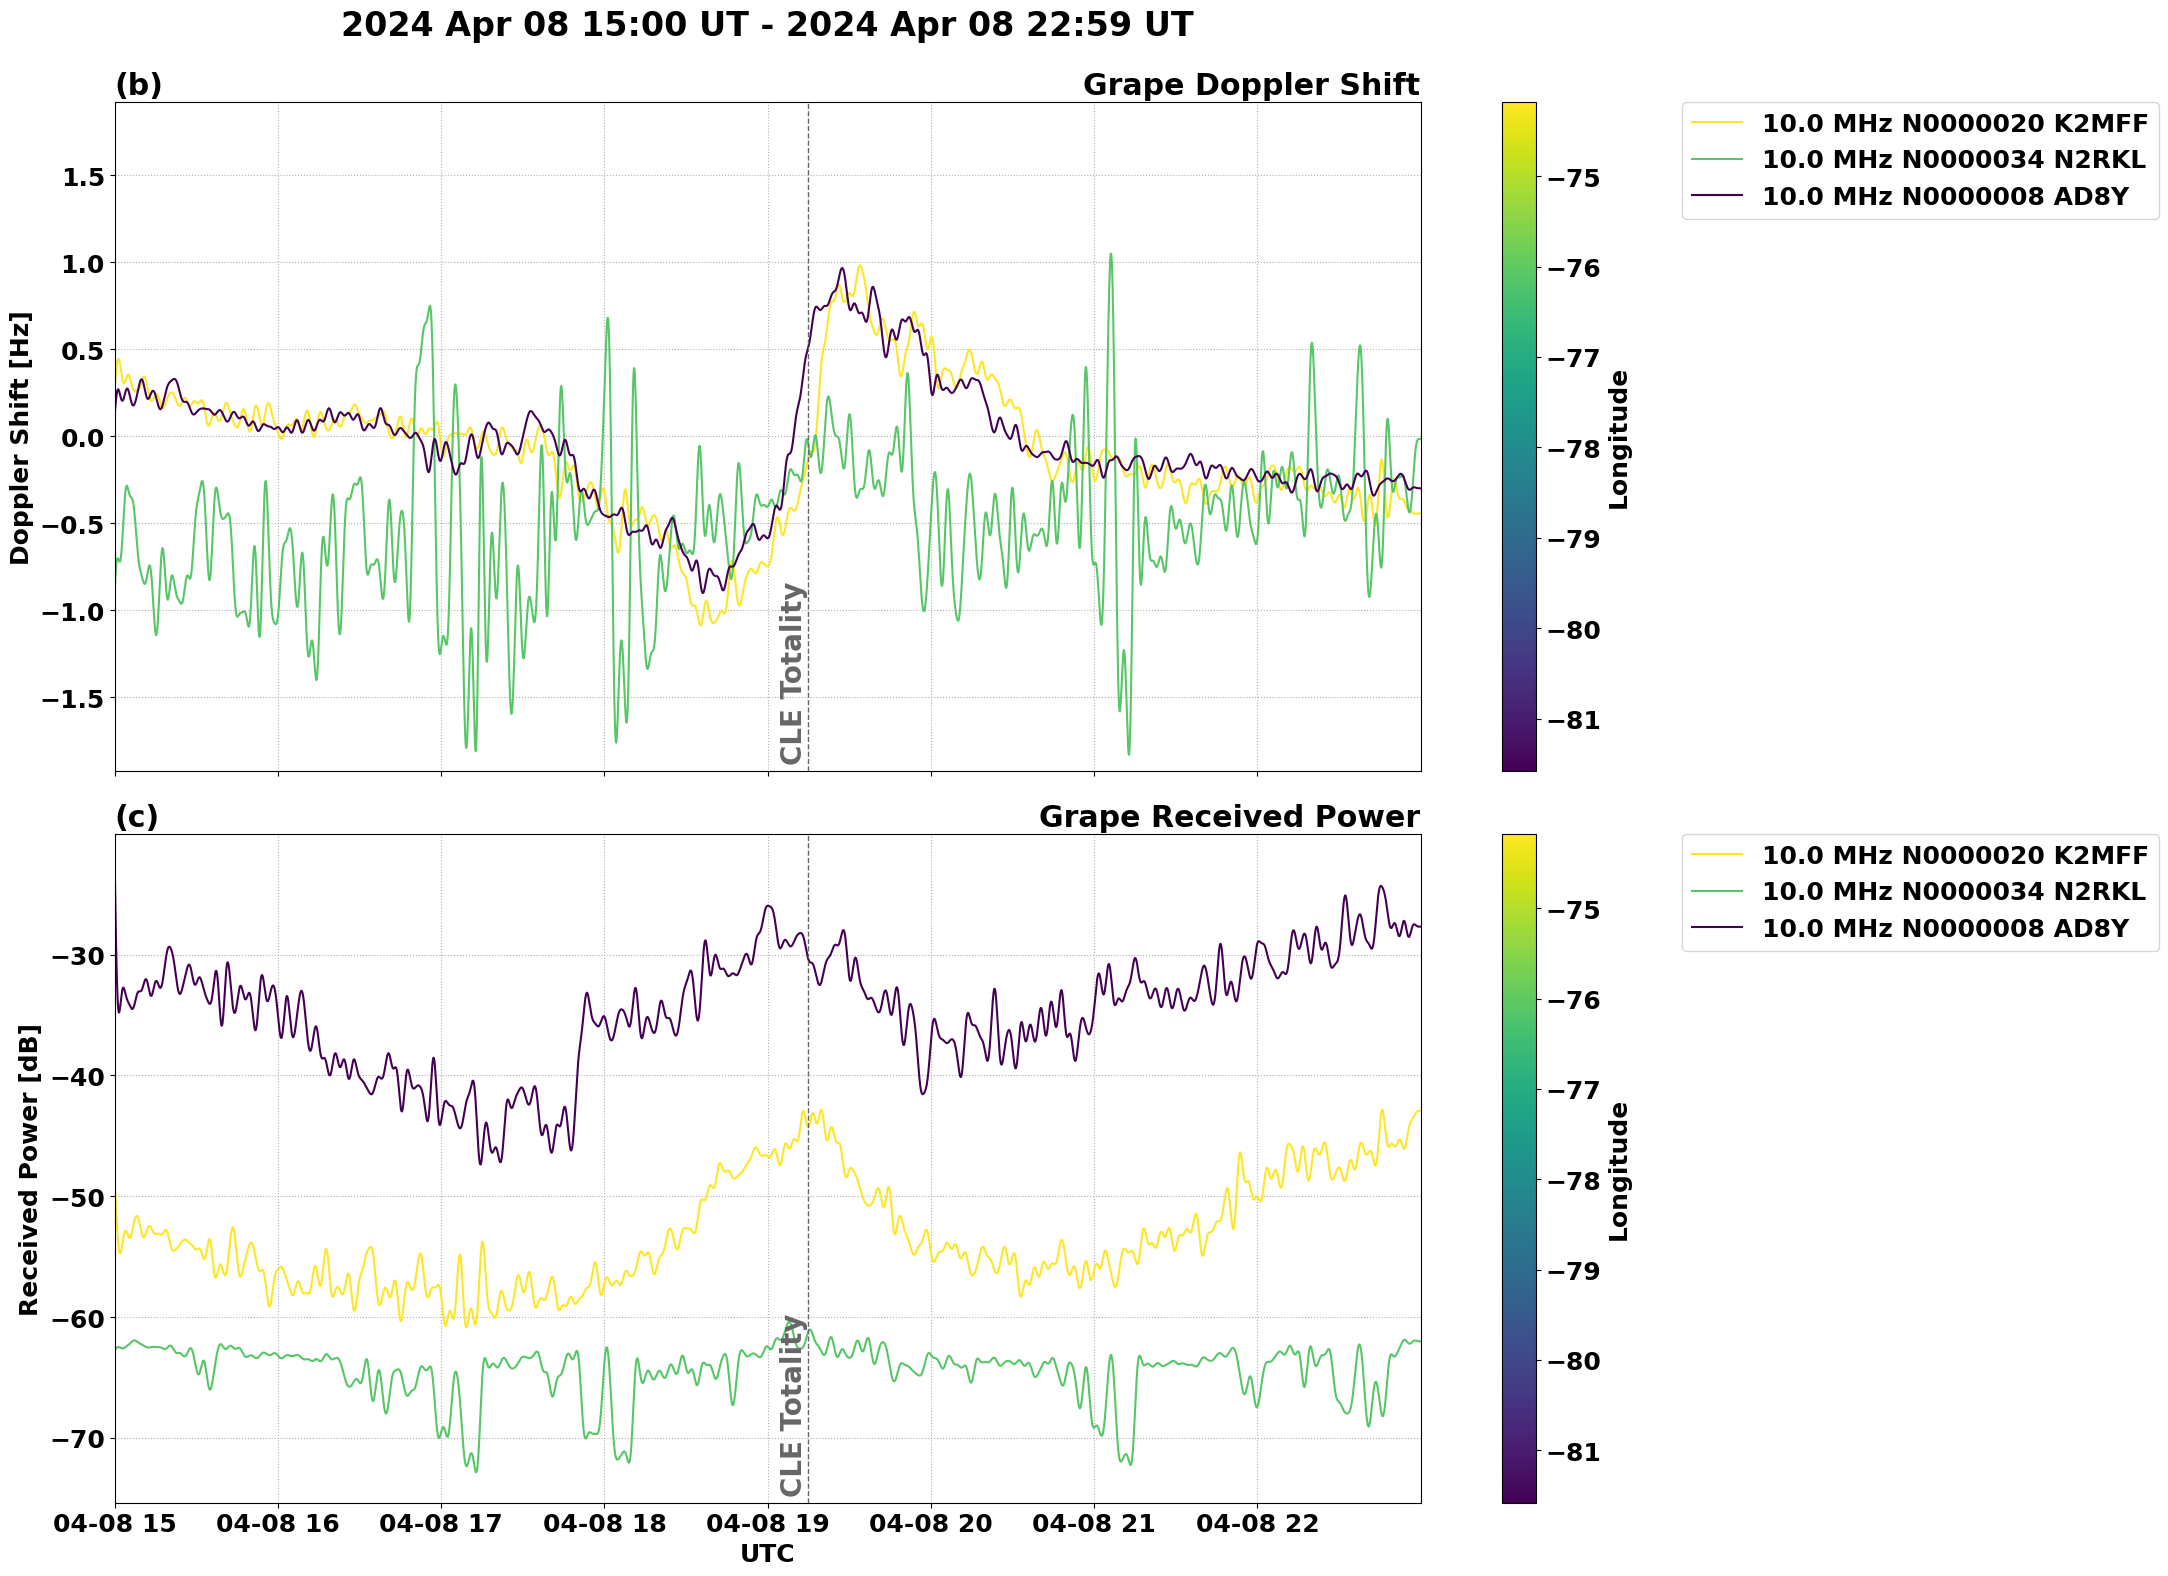

In [23]:
# WWV Coordinates
solar_lat   =   40.6683
solar_lon   = -105.0384

color_dct   = {'ckey':'lon'}
xkey        = 'UTC'
events      = [{'datetime':datetime.datetime(2024,4,8,19,15),'label':'CLE Totality'}]
mp.multiplot('filtered',color_dct=color_dct,xkey=xkey,solar_lat=solar_lat,solar_lon=solar_lon,events=events,plot_GOES=False)
plt.show()